Importing Data Libraries



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Data Importing

In [2]:
df=pd.read_csv(r"C:\Users\boina\Downloads\Medilab\Medilab\Animal Health.csv")

In [3]:
df

,AnimalName,BloodBrainDisease,AppearenceDisease,GeneralDisease,LungDisease,AbdominalDisease,HealthStatus
0,Dog,anemia,swelling,fever,difficulty in breathing,uteria inertia,Critical
1,Dog,anemia,emaciation,loss of appetite,difficulty in breathing,ulcers,Critical
2,Dog,jaundice,hairloss,loss of appetite,halitosis,ulcers,Critical
3,Dog,wasting,ruffled feathers,pains,pneumonia,uteria inertia,Critical
4,Dog,convulsions,scabs,weakness,dyspnea,fetopelvic disproportion,Critical
...,...,...,...,...,...,...,...
866,Buffaloes,seizures,hairloss,weakness,nasal discharge,diarrhea,Critical
867,Buffaloes,convulsions,ruffled feathers,sweating,pneumonia,ulcers,Critical
868,Buffaloes,wasting,hairloss,headache,pneumonia,ulcers,Critical
869,Buffaloes,anemia,hairloss,loss of appetite,difficulty in breathing,diarrhea,Critical


In [4]:
df.shape

(871, 7)

In [5]:
df['AnimalName'] = df['AnimalName'].replace('Cattle', 'Cow')
df['AnimalName'] = df['AnimalName'].replace('cattle', 'Cow')
df['AnimalName'] = df['AnimalName'].replace('duck', 'Duck')
df['AnimalName'] = df['AnimalName'].replace('chicken', 'Chicken')
df['AnimalName'] = df['AnimalName'].replace('horse', 'Horse')

In [6]:
df['AnimalName'] = df['AnimalName'].replace('Dogs', 'Dog')

Data Pre-processing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AnimalName         871 non-null    object
 1   BloodBrainDisease  871 non-null    object
 2   AppearenceDisease  871 non-null    object
 3   GeneralDisease     871 non-null    object
 4   LungDisease        871 non-null    object
 5   AbdominalDisease   871 non-null    object
 6   HealthStatus       869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB


In [8]:
df.describe()

,AnimalName,BloodBrainDisease,AppearenceDisease,GeneralDisease,LungDisease,AbdominalDisease,HealthStatus
count,871,871,871,871,871,871,869
unique,41,5,6,13,6,6,2
top,Buffaloes,anemia,emaciation,vomiting,halitosis,upset stomach,Critical
freq,129,207,168,79,173,164,849


In [9]:
df.nunique()

AnimalName           41
BloodBrainDisease     5
AppearenceDisease     6
GeneralDisease       13
LungDisease           6
AbdominalDisease      6
HealthStatus          2
dtype: int64

In [10]:
df.isnull().sum()

AnimalName           0
BloodBrainDisease    0
AppearenceDisease    0
GeneralDisease       0
LungDisease          0
AbdominalDisease     0
HealthStatus         2
dtype: int64

In [11]:
df.columns

Index(['AnimalName', 'BloodBrainDisease', 'AppearenceDisease',
       'GeneralDisease', 'LungDisease', 'AbdominalDisease', 'HealthStatus'],
      dtype='object')

Filling Missing Values

In [12]:
df['HealthStatus'].unique()

array(['Critical', 'Normal', nan], dtype=object)

In [13]:
df['HealthStatus'].value_counts()

HealthStatus
Critical    849
Normal       20
Name: count, dtype: int64

In [14]:
df['HealthStatus'].fillna('Critical',inplace=True)

In [15]:
df.isnull().sum()

AnimalName           0
BloodBrainDisease    0
AppearenceDisease    0
GeneralDisease       0
LungDisease          0
AbdominalDisease     0
HealthStatus         0
dtype: int64

Vizualisation

<Axes: xlabel='AnimalName'>

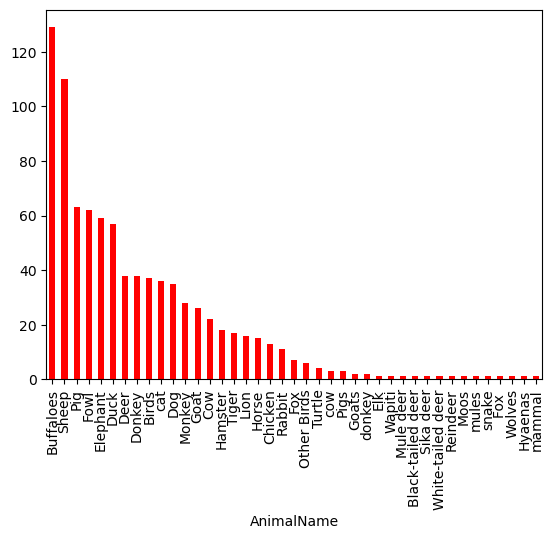

In [16]:
df['AnimalName'].value_counts().plot(kind='bar',color='Red')

<Axes: >

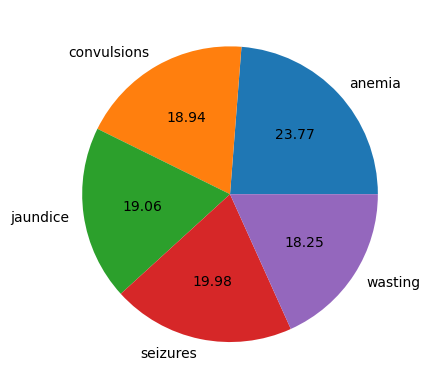

In [17]:
df.groupby('BloodBrainDisease').size().plot(kind='pie', autopct='%.2f')

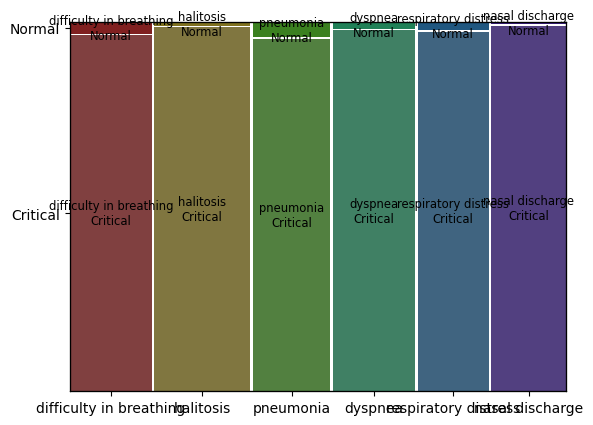

In [18]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['LungDisease','HealthStatus'])
plt.show()

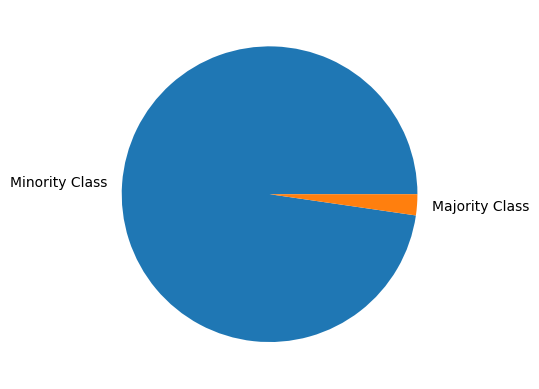

In [19]:
class_division = [ df[df['HealthStatus'] == 'Critical' ].shape[0], df[df['HealthStatus'] == 'Normal' ].shape[0] ]
my_labels = ['Minority Class', 'Majority Class']

plt.pie(class_division, labels = my_labels)
plt.show()


In [20]:
print("Proportion of Minority Class: " + str(round(df[df['HealthStatus'] == 'Normal' ].shape[0]/df.shape[0] * 100, 2)) + "%")

Proportion of Minority Class: 2.3%


In [21]:
df.columns

Index(['AnimalName', 'BloodBrainDisease', 'AppearenceDisease',
       'GeneralDisease', 'LungDisease', 'AbdominalDisease', 'HealthStatus'],
      dtype='object')

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
df['AnimalName']=le.fit_transform(df['AnimalName'])

In [24]:
df['BloodBrainDisease']=le.fit_transform(df['BloodBrainDisease'])
df['AppearenceDisease']=le.fit_transform(df['AppearenceDisease'])
df['GeneralDisease']=le.fit_transform(df['GeneralDisease'])
df['LungDisease']=le.fit_transform(df['LungDisease'])
df['AbdominalDisease']=le.fit_transform(df['AbdominalDisease'])
df['HealthStatus']=le.fit_transform(df['HealthStatus'])

In [25]:
df

,AnimalName,BloodBrainDisease,AppearenceDisease,GeneralDisease,LungDisease,AbdominalDisease,HealthStatus
0,6,0,4,2,0,5,0
1,6,0,0,4,0,3,0
2,6,2,1,4,2,3,0
3,6,4,2,6,4,5,0
4,6,1,3,12,1,2,0
...,...,...,...,...,...,...,...
866,2,3,1,12,3,1,0
867,2,1,2,10,4,3,0
868,2,4,1,3,4,3,0
869,2,0,1,4,0,1,0


<Axes: >

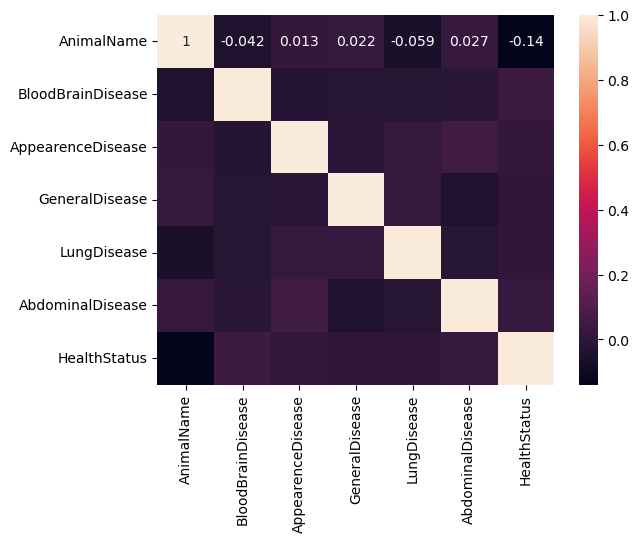

In [67]:
sns.heatmap(df.corr(),annot=True)

In [27]:
x = df.drop(['HealthStatus'],axis=1)
y = df['HealthStatus']

In [28]:
from sklearn.preprocessing import StandardScaler
stx= StandardScaler()
X = stx.fit_transform(x)

Splitting data

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)

In [30]:
print("Proportion of Minority Class in train set: " + str(round(ytrain.sum()/len(ytrain) * 100, 2)) + "%")
print("Proportion of Minority Class in test set: " + str(round(ytest.sum()/len(ytest) * 100, 2)) + "%")

Proportion of Minority Class in train set: 2.3%
Proportion of Minority Class in test set: 2.29%


In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
xbal,ybal=smote.fit_resample(xtrain,ytrain)

In [33]:
ybal.value_counts()

HealthStatus
0    595
1    595
Name: count, dtype: int64

Model Fitting

In [34]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [35]:
lr.fit(xbal,ybal)

LogisticRegression()

In [36]:
ytestpred=lr.predict(xtest)
ytrainpred=lr.predict(xtrain)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
acc_lr=accuracy_score(ytest, ytestpred)

In [39]:
print(accuracy_score(ytest, ytestpred))
print(accuracy_score(ytrain, ytrainpred))

0.6374045801526718
0.6568144499178982


In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [41]:
dtc.fit(xbal,ybal)

DecisionTreeClassifier()

In [42]:
ytestpredc=dtc.predict(xtest)
ytrainpredc=dtc.predict(xtrain)

In [43]:
acc_dt=accuracy_score(ytest, ytestpredc)

In [44]:
print(accuracy_score(ytest, ytestpredc))
print(accuracy_score(ytrain, ytrainpredc))

0.9351145038167938
0.9983579638752053


In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xbal,ybal)

RandomForestClassifier()

In [46]:
ytestpredr=rfc.predict(xtest)
ytrainpredr=rfc.predict(xtrain)

In [47]:
acc_rfc=accuracy_score(ytest, ytestpredr)

In [48]:
print(accuracy_score(ytest, ytestpredr))
print(accuracy_score(ytrain, ytrainpredr))

0.9656488549618321
0.9983579638752053


In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(xbal, ybal)

KNeighborsClassifier()

In [50]:
ytestpredk=knn.predict(xtest)
ytrainpredk=knn.predict(xtrain)

In [51]:
acc_knn=accuracy_score(ytest, ytestpredk)

In [52]:
print(accuracy_score(ytest, ytestpredk))
print(accuracy_score(ytrain, ytrainpredk))

0.7709923664122137
0.8768472906403941


Metrics

In [53]:
ytest.value_counts()

HealthStatus
0    256
1      6
Name: count, dtype: int64

In [54]:
#logistic regression
cross_tab_test = pd.crosstab(ytest, ytestpred)
print("Cross-Tabulation for Test Set:\n", cross_tab_test)

cross_tab_train = pd.crosstab(ytrain, ytrainpred)
print("Cross-Tabulation for Training Set:\n", cross_tab_train)

Cross-Tabulation for Test Set:
 col_0           0   1
HealthStatus         
0             161  95
1               0   6
Cross-Tabulation for Training Set:
 col_0           0    1
HealthStatus          
0             388  207
1               2   12


In [55]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(ytest, ytestpred))
print(classification_report(ytrain, ytrainpred))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77       256
           1       0.06      1.00      0.11         6

    accuracy                           0.64       262
   macro avg       0.53      0.81      0.44       262
weighted avg       0.98      0.64      0.76       262

              precision    recall  f1-score   support

           0       0.99      0.65      0.79       595
           1       0.05      0.86      0.10        14

    accuracy                           0.66       609
   macro avg       0.52      0.75      0.45       609
weighted avg       0.97      0.66      0.77       609



In [56]:
#decision tree
pd.crosstab(ytest, ytestpredc)




col_0,0,1
HealthStatus,,
0,241,15
1,2,4


In [57]:
print(classification_report(ytest, ytestpredc))
print(classification_report(ytrain, ytrainpredc))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       256
           1       0.21      0.67      0.32         6

    accuracy                           0.94       262
   macro avg       0.60      0.80      0.64       262
weighted avg       0.97      0.94      0.95       262

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       595
           1       1.00      0.93      0.96        14

    accuracy                           1.00       609
   macro avg       1.00      0.96      0.98       609
weighted avg       1.00      1.00      1.00       609



In [58]:
#Random forest
pd.crosstab(ytest, ytestpredr)

col_0,0,1
HealthStatus,,
0,251,5
1,4,2


In [59]:
print(classification_report(ytest, ytestpredr))
print(classification_report(ytrain, ytrainpredr))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       256
           1       0.29      0.33      0.31         6

    accuracy                           0.97       262
   macro avg       0.64      0.66      0.65       262
weighted avg       0.97      0.97      0.97       262

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       595
           1       1.00      0.93      0.96        14

    accuracy                           1.00       609
   macro avg       1.00      0.96      0.98       609
weighted avg       1.00      1.00      1.00       609



In [60]:
#knn
pd.crosstab(ytest, ytestpredk)




col_0,0,1
HealthStatus,,
0,200,56
1,4,2


In [61]:
print(classification_report(ytest, ytestpredk))
print(classification_report(ytrain, ytrainpredk))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       256
           1       0.03      0.33      0.06         6

    accuracy                           0.77       262
   macro avg       0.51      0.56      0.47       262
weighted avg       0.96      0.77      0.85       262

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       595
           1       0.16      1.00      0.27        14

    accuracy                           0.88       609
   macro avg       0.58      0.94      0.60       609
weighted avg       0.98      0.88      0.92       609



In [62]:
accuracy_df=pd.DataFrame({'model':['logistic regression','decision tree','random forest','k-nearest neigbour'],
                         'Accuracy':[acc_lr*100,acc_dt*100,acc_rfc*100,acc_knn*100]})
print(accuracy_df)

                 model   Accuracy
0  logistic regression  63.740458
1        decision tree  93.511450
2        random forest  96.564885
3   k-nearest neigbour  77.099237


C:\Users\boina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\boina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\boina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_d

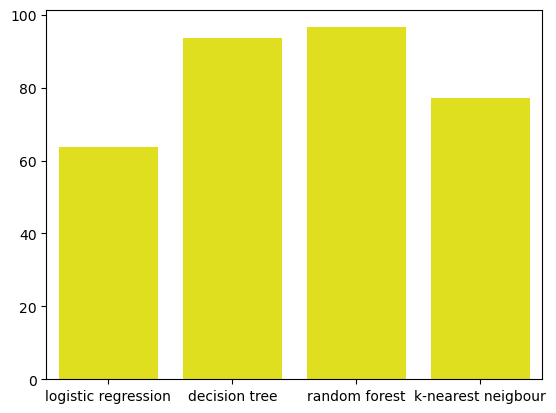

In [63]:
models=['logistic regression','decision tree','random forest','k-nearest neigbour']
accuracy=[acc_lr*100,acc_dt*100,acc_rfc*100,acc_knn*100]
sns.barplot(x=models,y=accuracy,color='Yellow')
plt.show()

In [64]:
import pickle
pickle.dump(rfc,open("rfc.pkl","wb"))

In [65]:
print(rfc.predict([[4,3,2,6,4,5]]))

[0]


In [66]:
pwd


'C:\\Users\\boina'